# Import Library

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [123]:
df = pd.read_csv('databaru.csv')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      18207 non-null  int64  
 1   ID                              18207 non-null  int64  
 2   Name                            18207 non-null  object 
 3   Age                             18207 non-null  int64  
 4   Nationality                     18207 non-null  object 
 5   Overall                         18207 non-null  int64  
 6   Potential                       18207 non-null  int64  
 7   Club                            18207 non-null  object 
 8   Value                           18207 non-null  object 
 9   Wage                            18207 non-null  object 
 10  Preferred Foot                  18207 non-null  object 
 11  International Reputation        18207 non-null  float64
 12  Weak Foot                       

In [125]:
print("Pengecekan nilai yang NULL")
df.isna().sum()

Pengecekan nilai yang NULL


Unnamed: 0                        0
ID                                0
Name                              0
Age                               0
Nationality                       0
                                 ..
GKReflexes                        0
Release Clause                    0
HeadingAccuracyHeadingAccuracy    0
OverallEncoded                    0
0                                 0
Length: 61, dtype: int64

In [126]:
df.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,HeadingAccuracyHeadingAccuracy,OverallEncoded,0
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,...,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,70.0,47.0,47.0
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,89.0,47.0,47.0
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,...,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,62.0,46.0,46.0
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,...,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,21.0,45.0,45.0
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,...,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,55.0,45.0,45.0


# Algoritma K-Means Clustering

In [127]:
X = df.iloc[:,[5,6]].values

In [128]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[4 4 4 ... 3 3 3]


# Visualisasi Data

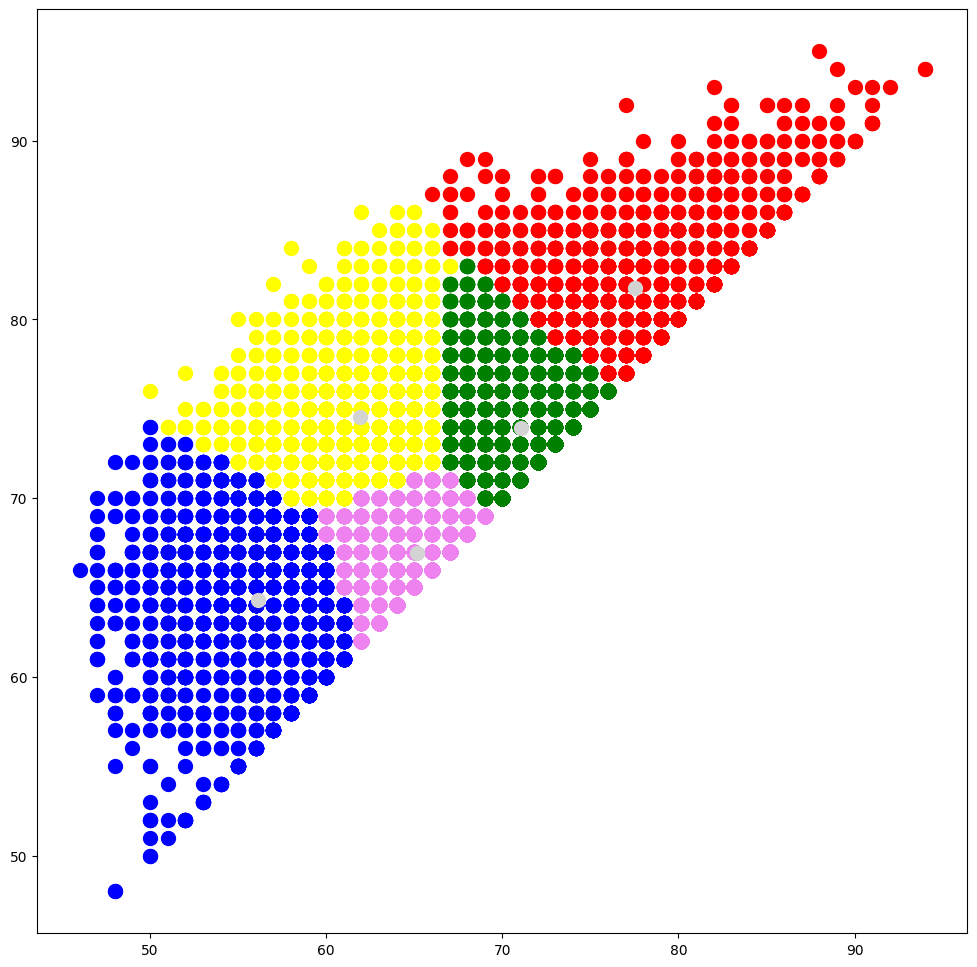

In [129]:
plt.figure(figsize=(12,12))
plt.scatter(X[Y==0,0], X[Y==0,1], s=100, c='violet', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=100, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=100, c='blue', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=100, c='red', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='lightgrey', label='Centroids')

plt.show()

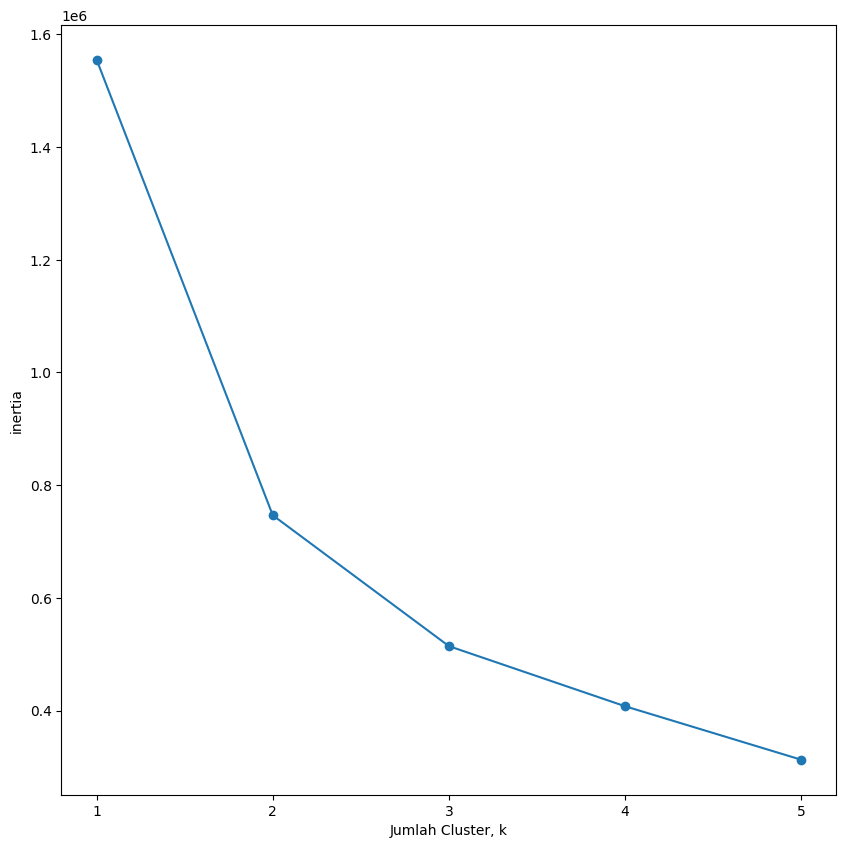

In [130]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

    
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()